<a href="https://colab.research.google.com/github/jmarquez211/Asteroides/blob/main/credittesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's see the main dataset, where it's located the **features**

In [2]:
import pandas as pd

df_application = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit card/application_record.csv')

df_application.head()


ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

Here is the other dataset.

In [3]:
df_credit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit card/credit_record.csv')

df_credit

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

We want to predict and classify if somone can get a credit card, so we have to do some modifications in order to do so.

In [4]:
starter_month=pd.DataFrame(df_credit.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
starter_month=starter_month.rename(columns={'MONTHS_BALANCE':'Account day'})
df_application=pd.merge(df_application,starter_month,how='left',on='ID')

df_credit['dep_value'] = None
df_credit['dep_value'][df_credit['STATUS'] =='2']='Yes'
df_credit['dep_value'][df_credit['STATUS'] =='3']='Yes'
df_credit['dep_value'][df_credit['STATUS'] =='4']='Yes'
df_credit['dep_value'][df_credit['STATUS'] =='5']='Yes'

cpunt=df_credit.groupby('ID').count()
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes'
cpunt['dep_value'][cpunt['dep_value'] == 0]='No'
cpunt = cpunt[['dep_value']]

df_application = pd.merge(df_application,cpunt,how='inner',on='ID')
df_application['Risky']=df_application['dep_value']
df_application.loc[df_application['Risky']=='Yes','Risky']=1
df_application.loc[df_application['Risky']=='No','Risky']=0
df_application.drop('dep_value',axis=1,inplace=True)

<ipython-input-4-c93fe06895c1>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  starter_month=pd.DataFrame(df_credit.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
<ipython-input-4-c93fe06895c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit['dep_value'][df_credit['STATUS'] =='2']='Yes'
<ipython-input-4-c93fe06895c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit['dep_value'][df_credit['STATUS'] =='3']='Yes'
<ipyth

In [ ]:
df_application['Account day'].unique()

array([-15., -14., -29.,  -4., -26., -38., -20., -16., -17.,  -5., -42.,
        -8., -22.,  -7.,  -3., -25., -30., -31., -19., -34., -44., -24.,
       -18., -39., -13., -55., -43., -11., -46., -51.,   0., -28., -27.,
       -10.,  -2., -21., -45., -40., -48., -37., -36., -32., -23., -12.,
        -9.,  -6.,  -1., -54., -49., -58., -35., -59., -41., -33., -56.,
       -47., -60., -53., -57., -50., -52.])

Let's print the unique types of several categorical features

In [ ]:
df_application['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
df_application['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
df_application['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [ ]:
df_application['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
df_application['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

Now we need to see the statistics of the main dataset to get insights

In [5]:
df_application.describe()

ID  CNT_CHILDREN  AMT_INCOME_TOTAL    DAYS_BIRTH  \
count  3.645700e+04  36457.000000      3.645700e+04  36457.000000   
mean   5.078227e+06      0.430315      1.866857e+05 -15975.173382   
std    4.187524e+04      0.742367      1.017892e+05   4200.549944   
min    5.008804e+06      0.000000      2.700000e+04 -25152.000000   
25%    5.042028e+06      0.000000      1.215000e+05 -19438.000000   
50%    5.074614e+06      0.000000      1.575000e+05 -15563.000000   
75%    5.115396e+06      1.000000      2.250000e+05 -12462.000000   
max    5.150487e+06     19.000000      1.575000e+06  -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE    FLAG_PHONE    FLAG_EMAIL  \
count   36457.000000     36457.0     36457.000000  36457.000000  36457.000000   
mean    59262.935568         1.0         0.225526      0.294813      0.089722   
std    137651.334859         0.0         0.417934      0.455965      0.285787   
min    -15713.000000         1.0         0.000000      0.000000      0.000000   
25%     -3153.000000         1.0         0.000000      0.000000      0.000000   
50%     -1552.000000         1.0         0.000000      0.000000      0.000000   
75%      -408.000000         1.0         0.000000      1.000000      0.000000   
max    365243.000000         1.0         1.000000      1.000000      1.000000   

       CNT_FAM_MEMBERS   Account day  
count     36457.000000  36457.000000  
mean          2.198453    -26.164193  
std           0.911686     16.501854  
min           1.000000    -60.000000  
25%           2.000000    -39.000000  
50%           2.000000    -24.000000  
75%           3.000000    -12.000000  
max          20.000000      0.000000

In [ ]:
df_application['AMT_INCOME_TOTAL'].min()

27000.0

In [ ]:
df_application['AMT_INCOME_TOTAL'].max()

1575000.0

We do not need the ID feature so we remove it


In [ ]:
df_application.drop('ID',axis=1,inplace=True)

Let's see what features are null

In [ ]:
df_application.isnull().sum()

CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
Account day                0
Risky                      0
dtype: int64

We see ***OCCUPATION_TYPE*** has the most null values, so we replace them with the mode

In [6]:
df_application['OCCUPATION_TYPE'].fillna(df_application['OCCUPATION_TYPE'].mode()[0], inplace=True)

In [ ]:
df_application.isna().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
Account day            0
Risky                  0
dtype: int64

It's turn to see some interesting plots. First of all, we'll see the comparation between the number of men and women in the dataset

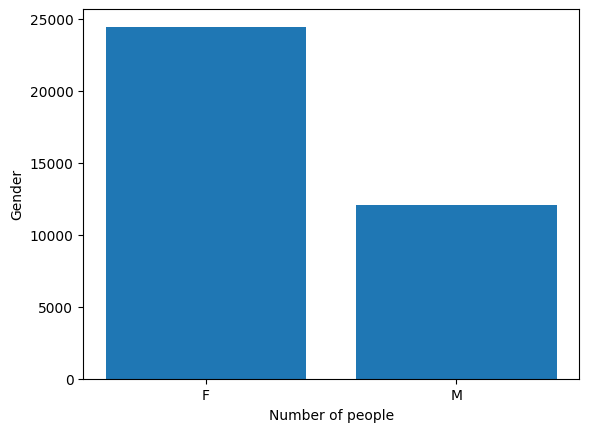

In [ ]:
import matplotlib.pyplot as plt

#positions_gen = range(len(df_train_copy['CODE_GENDER']))

plt.bar(df_application['CODE_GENDER'].value_counts().index,df_application['CODE_GENDER'].value_counts().values)
plt.xlabel('Number of people')
plt.ylabel('Gender')
plt.show();

The feature ***DAYS_EMPLOYED*** was made counting the days of one person its personal working experience. Let's change it making the transformation to express the result in years

In [7]:
def days_Employed(df_application):
  df_application['DAYS_EMPLOYED'] = df_application['DAYS_EMPLOYED'].abs() / 365

  return df_application

df_application = days_Employed(df_application)
df_application['DAYS_EMPLOYED']

0        12.443836
1        12.443836
2         3.106849
3         8.358904
4         8.358904
           ...    
36452     6.630137
36453     3.630137
36454     3.630137
36455     1.794521
36456     3.268493
Name: DAYS_EMPLOYED, Length: 36457, dtype: float64

In [8]:
df_application['DAYS_EMPLOYED'].max()



1000.6657534246575

Obviosly this is an outlier, we'll handle it in the proper way

In [9]:
df_application['DAYS_EMPLOYED'] = df_application['DAYS_EMPLOYED'].replace({1000.6657534246575: 17.5,})

In [10]:
df_application['DAYS_EMPLOYED'].max()

43.04931506849315

In [11]:
df_application = df_application.rename({'DAYS_EMPLOYED': 'YEARS_EMPLOYED',}, axis=1)
df_application = df_application.rename({'DAYS_BIRTH': 'YEARS_BIRTH',}, axis=1)

In [12]:
df_application[:6]

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   
5  5008810           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   
5          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  YEARS_BIRTH  YEARS_EMPLOYED  \
0        Civil marriage   Rented apartment       -12005       12.443836   
1        Civil marriage   Rented apartment       -12005       12.443836   
2               Married  House / apartment       -21474        3.106849   
3  Single / not married  House / apartment       -19110        8.358904   
4  Single / not married  House / apartment       -19110        8.358904   
5  Single / not married  House / apartment       -19110        8.358904   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0        Laborers   
1           1                1           0           0        Laborers   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   
5           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  Account day Risky  
0              2.0        -15.0     0  
1              2.0        -14.0     0  
2              2.0        -29.0     0  
3              1.0         -4.0     0  
4              1.0        -26.0     0  
5              1.0        -26.0     0

***DAYS_BIRTH*** will be transform in the same way as ***DAYS_EMPLOYED***

In [14]:
def days_Birth(df_application):
  df_application['YEARS_BIRTH'] = df_application['YEARS_BIRTH'].abs() / 365

  return df_application

df_application = days_Birth(df_application)
df_application['YEARS_BIRTH']

0        32.890411
1        32.890411
2        58.832877
3        52.356164
4        52.356164
           ...    
36452    47.528767
36453    33.936986
36454    33.936986
36455    49.200000
36456    25.172603
Name: YEARS_BIRTH, Length: 36457, dtype: float64

In [15]:
df_application.describe()

ID  CNT_CHILDREN  AMT_INCOME_TOTAL   YEARS_BIRTH  \
count  3.645700e+04  36457.000000      3.645700e+04  36457.000000   
mean   5.078227e+06      0.430315      1.866857e+05     43.767598   
std    4.187524e+04      0.742367      1.017892e+05     11.508356   
min    5.008804e+06      0.000000      2.700000e+04     20.517808   
25%    5.042028e+06      0.000000      1.215000e+05     34.142466   
50%    5.074614e+06      0.000000      1.575000e+05     42.638356   
75%    5.115396e+06      1.000000      2.250000e+05     53.254795   
max    5.150487e+06     19.000000      1.575000e+06     68.909589   

       YEARS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE    FLAG_PHONE  \
count    36457.000000     36457.0     36457.000000  36457.000000   
mean         8.973174         1.0         0.225526      0.294813   
std          7.028894         0.0         0.417934      0.455965   
min          0.046575         1.0         0.000000      0.000000   
25%          3.202740         1.0         0.000000      0.000000   
50%          6.898630         1.0         0.000000      0.000000   
75%         15.558904         1.0         0.000000      1.000000   
max         43.049315         1.0         1.000000      1.000000   

         FLAG_EMAIL  CNT_FAM_MEMBERS   Account day  
count  36457.000000     36457.000000  36457.000000  
mean       0.089722         2.198453    -26.164193  
std        0.285787         0.911686     16.501854  
min        0.000000         1.000000    -60.000000  
25%        0.000000         2.000000    -39.000000  
50%        0.000000         2.000000    -24.000000  
75%        0.000000         3.000000    -12.000000  
max        1.000000        20.000000      0.000000

In [16]:
df_application['YEARS_BIRTH'].min()

20.517808219178082

In [17]:
df_application['YEARS_BIRTH'].max()

68.90958904109588

In [18]:
df_application['YEARS_EMPLOYED'].min()

0.04657534246575343

In [19]:
df_application['YEARS_EMPLOYED'].max()

43.04931506849315

We can see the age distribution with a box plot

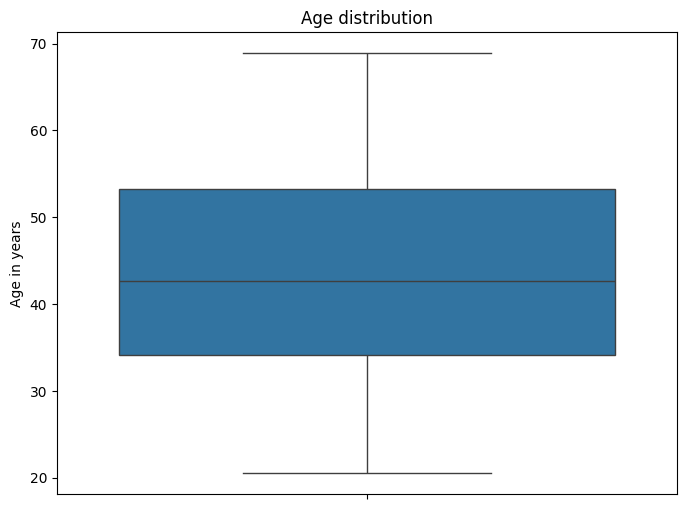

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico si es necesario
sns.boxplot(y='YEARS_BIRTH', data=df_application)
plt.title('Age distribution')
plt.ylabel('Age in years')
plt.show();

The distribution of working experience represented with a box plot


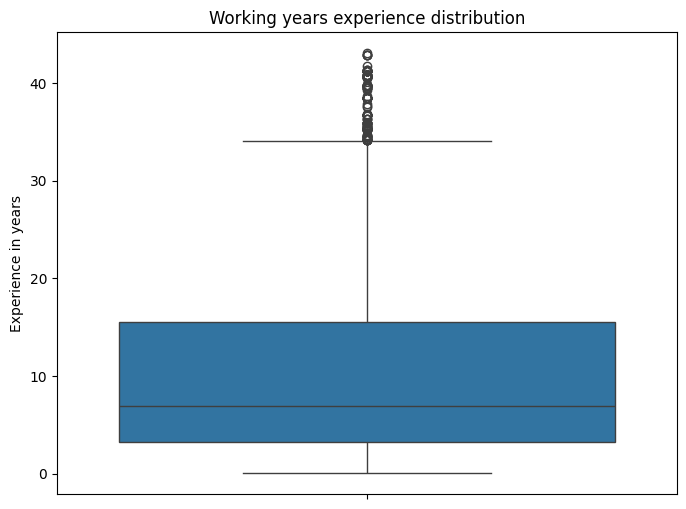

In [25]:

# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico si es necesario
sns.boxplot(y='YEARS_EMPLOYED', data=df_application)
plt.title('Working years experience distribution')
plt.ylabel('Experience in years')
plt.show();

It's turn for the income. We are consider the salary is paid with dollars

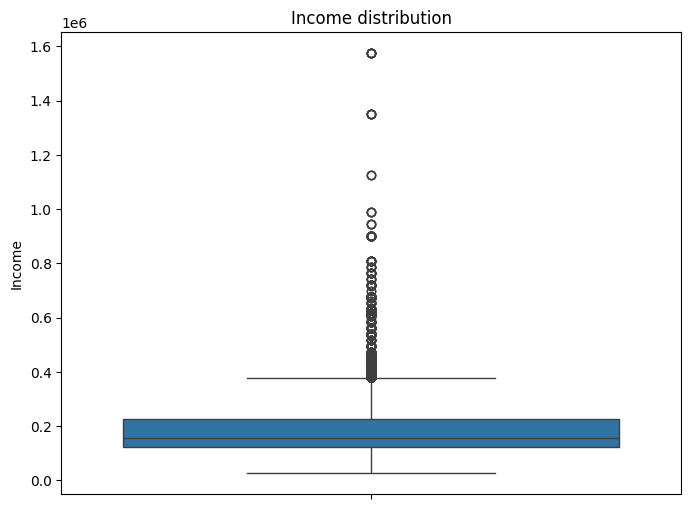

In [ ]:


# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico si es necesario
sns.boxplot(y='AMT_INCOME_TOTAL', data=df_application)
plt.title('Income distribution')
plt.ylabel('Income')
plt.show();

We want to see the number of members per family and its distribution

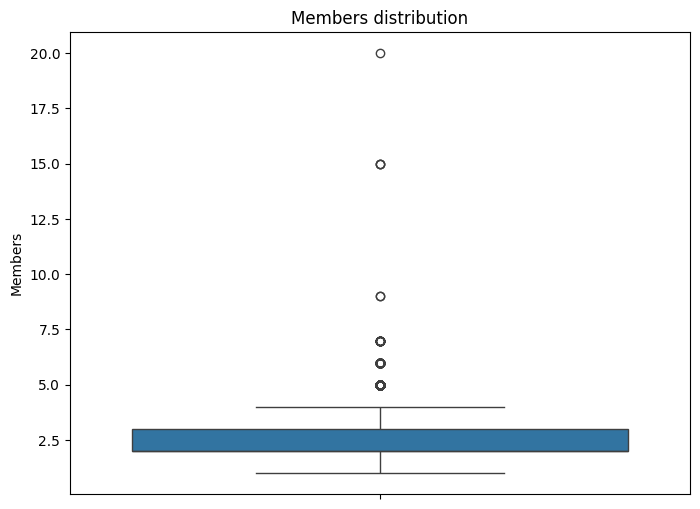

In [ ]:
# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico si es necesario
sns.boxplot(y='CNT_FAM_MEMBERS', data=df_application)
plt.title('Members distribution')
plt.ylabel('Members')
plt.show();

Let's make some modifications, removing outliers

In [27]:
import numpy as np

# IQR
# Calculate the upper and lower limits
Q1 = df_application['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = df_application['CNT_FAM_MEMBERS'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_application['CNT_FAM_MEMBERS'] >= upper)[0]
lower_array = np.where(df_application['CNT_FAM_MEMBERS'] <= lower)[0]

# Removing the outliers
df_application.drop(index=upper_array, inplace=True)
df_application.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_application.shape)

New Shape:  (35977, 20)


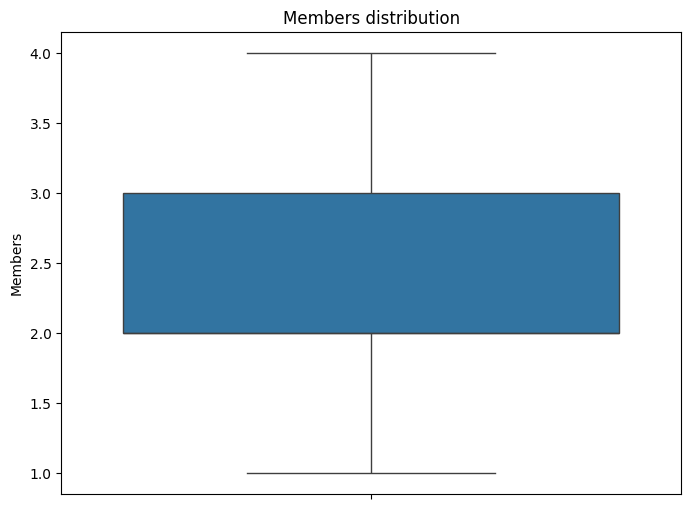

In [28]:
# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico si es necesario
sns.boxplot(y='CNT_FAM_MEMBERS', data=df_application)
plt.title('Members distribution')
plt.ylabel('Members')
plt.show();

In [34]:
df_application.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   
5  5008810           F            N               Y             0   
6  5008811           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   
5          270000.0  Commercial associate  Secondary / secondary special   
6          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  YEARS_BIRTH  YEARS_EMPLOYED  \
2               Married  House / apartment    58.832877        3.106849   
3  Single / not married  House / apartment    52.356164        8.358904   
4  Single / not married  House / apartment    52.356164        8.358904   
5  Single / not married  House / apartment    52.356164        8.358904   
6  Single / not married  House / apartment    52.356164        8.358904   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   
5           1                0           1           1     Sales staff   
6           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  Account day Risky  
2              2.0        -29.0     0  
3              1.0         -4.0     0  
4              1.0        -26.0     0  
5              1.0        -26.0     0  
6              1.0        -38.0     0

In [ ]:
df_application.shape

(35977, 19)

***AMT_INCOME_TOTAL*** also has several outliers, we proccess them

In [29]:
# IQR
# Calculate the upper and lower limits
Q1_income = df_application['AMT_INCOME_TOTAL'].quantile(0.25)
Q3_income = df_application['AMT_INCOME_TOTAL'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_income = Q1_income - 1.5*IQR_income
upper_income = Q3_income + 1.5*IQR_income

# Create arrays of Boolean values indicating the outlier rows
upper_array_income = np.where(df_application['AMT_INCOME_TOTAL'] >= upper_income)[0]
lower_array_income = np.where(df_application['AMT_INCOME_TOTAL'] <= lower_income)[0]

# Filtrar los índices que están presentes en el DataFrame
upper_array_income_filtered = [index for index in upper_array_income if index in df_application.index]
lower_array_income_filtered = [index for index in lower_array_income if index in df_application.index]

# Eliminar los outliers
df_application.drop(index=upper_array_income_filtered, inplace=True)
df_application.drop(index=lower_array_income_filtered, inplace=True)


# Print the new shape of the DataFrame
print("New Shape: ", df_application.shape)

New Shape:  (34506, 20)


In [ ]:
df_application['AMT_INCOME_TOTAL'].max()



1575000.0

In [31]:
# Calcular la media y la desviación estándar
mean = df_application['AMT_INCOME_TOTAL'].mean()
std_dev = df_application['AMT_INCOME_TOTAL'].std()

# Definir los límites
lower_limit = mean - 3 * std_dev
upper_limit = mean + 3 * std_dev

# Eliminar los outliers
df_application = df_application[(df_application['AMT_INCOME_TOTAL'] >= lower_limit) & (df_application['AMT_INCOME_TOTAL'] <= upper_limit)]

# Print the new shape of the DataFrame
print("New Shape: ", df_application.shape)

New Shape:  (34061, 20)


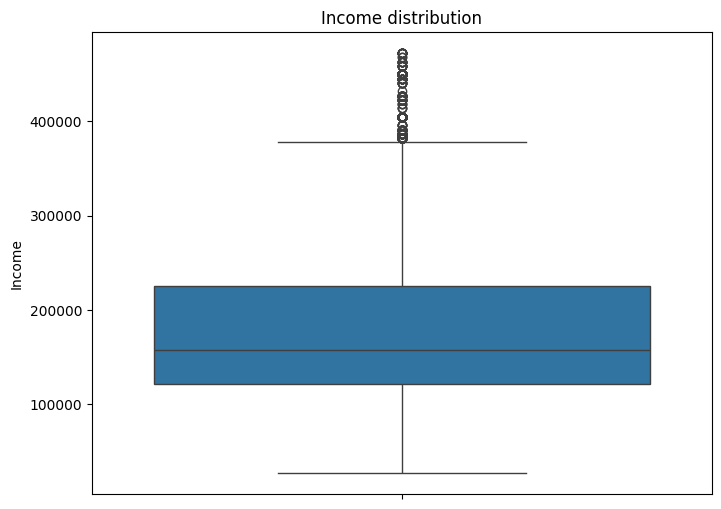

In [32]:
# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico si es necesario
sns.boxplot(y='AMT_INCOME_TOTAL', data=df_application)
plt.title('Income distribution')
plt.ylabel('Income')
plt.show();

We shall do the same for the working years

In [35]:
# Calcular la media y la desviación estándar
mean_em = df_application['YEARS_EMPLOYED'].mean()
std_dev_em = df_application['YEARS_EMPLOYED'].std()

# Definir los límite
lower_limit_e = mean_em - 3 * std_dev_em
upper_limit_e = mean_em + 3 * std_dev_em

# Eliminar los outliers
df_application = df_application[(df_application['YEARS_EMPLOYED'] >= lower_limit_e) & (df_application['YEARS_EMPLOYED'] <= upper_limit_e)]

# Print the new shape of the DataFrame
print("New Shape: ", df_application.shape)

New Shape:  (33770, 20)


In [36]:
df_application['YEARS_EMPLOYED'].mean()

8.791684724627922

In [37]:
df_application['YEARS_EMPLOYED'].max()

30.12054794520548

In [38]:
# IQR
# Calculate the upper and lower limits
Q1_em = df_application['YEARS_EMPLOYED'].quantile(0.25)
Q3_em = df_application['YEARS_EMPLOYED'].quantile(0.75)
IQR_em = Q3_em - Q1_em
lower_em = Q1_em - 1.5*IQR_em
upper_em = Q3_em + 1.5*IQR_em

# Create arrays of Boolean values indicating the outlier rows
upper_array_em = np.where(df_application['CNT_FAM_MEMBERS'] >= upper_em)[0]
lower_array_em = np.where(df_application['CNT_FAM_MEMBERS'] <= lower_em)[0]

# Removing the outliers
df_application.drop(index=upper_array_em, inplace=True)
df_application.drop(index=lower_array_em, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_application.shape)

New Shape:  (33770, 20)


<ipython-input-38-f684f1ae2e7f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application.drop(index=upper_array_em, inplace=True)
<ipython-input-38-f684f1ae2e7f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application.drop(index=lower_array_em, inplace=True)


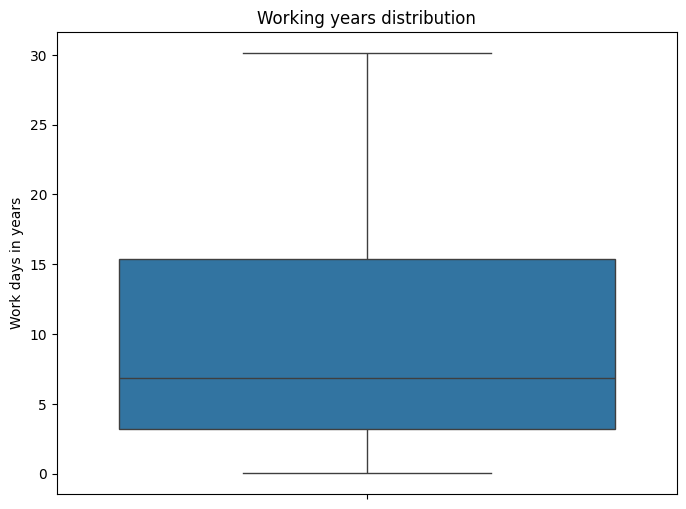

In [39]:
# Crear el boxplot con Seaborn



plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico si es necesario
sns.boxplot(y='YEARS_EMPLOYED', data=df_application)
plt.title('Working years distribution')
plt.ylabel('Work days in years')
plt.show();

In [40]:
df_application.describe()

ID  CNT_CHILDREN  AMT_INCOME_TOTAL   YEARS_BIRTH  \
count  3.377000e+04  33770.000000      33770.000000  33770.000000   
mean   5.078187e+06      0.393012     179673.970136     43.742055   
std    4.191221e+04      0.652423      81368.673474     11.564308   
min    5.008806e+06      0.000000      27000.000000     20.517808   
25%    5.042032e+06      0.000000     121500.000000     33.983562   
50%    5.069514e+06      0.000000     157500.000000     42.639726   
75%    5.115425e+06      1.000000     225000.000000     53.263014   
max    5.150487e+06      3.000000     472500.000000     68.909589   

       YEARS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE    FLAG_PHONE  \
count    33770.000000     33770.0     33770.000000  33770.000000   
mean         8.791685         1.0         0.225437      0.292893   
std          6.670502         0.0         0.417876      0.455097   
min          0.046575         1.0         0.000000      0.000000   
25%          3.178082         1.0         0.000000      0.000000   
50%          6.852055         1.0         0.000000      0.000000   
75%         15.391781         1.0         0.000000      1.000000   
max         30.120548         1.0         1.000000      1.000000   

         FLAG_EMAIL  CNT_FAM_MEMBERS   Account day  
count  33770.000000     33770.000000  33770.000000  
mean       0.087030         2.159757    -26.118182  
std        0.281883         0.833696     16.513969  
min        0.000000         1.000000    -60.000000  
25%        0.000000         2.000000    -39.000000  
50%        0.000000         2.000000    -24.000000  
75%        0.000000         3.000000    -12.000000  
max        1.000000         4.000000      0.000000

We want to explore other features that we consider them important for the predictions

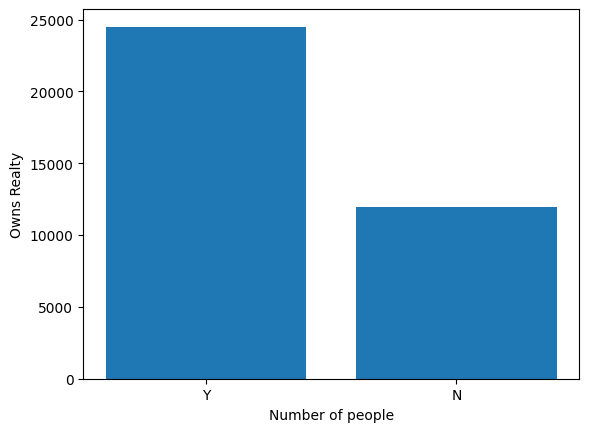

In [ ]:
plt.bar(df_application['FLAG_OWN_REALTY'].value_counts().index, df_application['FLAG_OWN_REALTY'].value_counts().values)
plt.xlabel('Number of people')
plt.ylabel('Owns Realty')
plt.show()

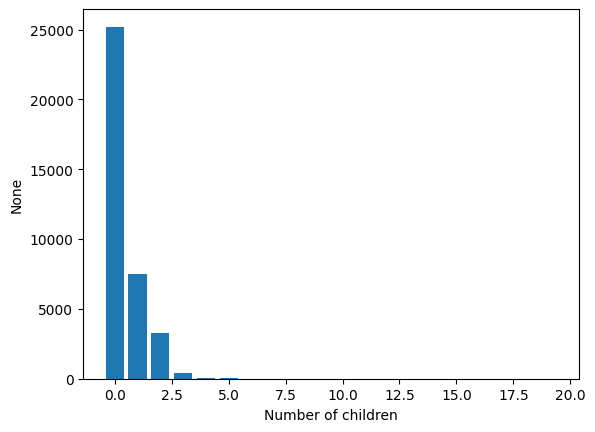

In [ ]:
plt.bar(df_application['CNT_CHILDREN'].value_counts().index, df_application['CNT_CHILDREN'].value_counts().values)
plt.xlabel('Number of children')
plt.ylabel('None')
plt.show()

Let's divide the number of children in two groups. One with less or equal to three and the other one with more than three

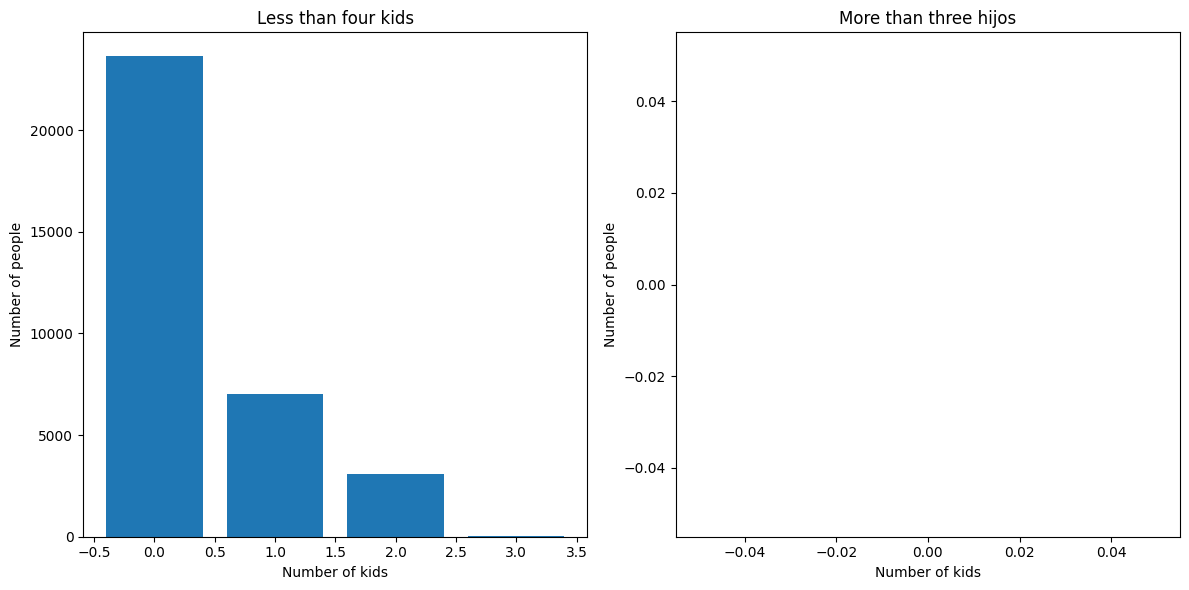

In [44]:
df_few_children = df_application[df_application['CNT_CHILDREN'] <= 3]
df_many_children = df_application[df_application['CNT_CHILDREN'] > 3]

# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graficar el primer subplot: menos de 4 hijos
axs[0].bar(df_few_children['CNT_CHILDREN'].value_counts().index, df_few_children['CNT_CHILDREN'].value_counts().values)
axs[0].set_title('Less than four kids')
axs[0].set_xlabel('Number of kids')
axs[0].set_ylabel('Number of people')

# Graficar el segundo subplot: más de 3 hijos
axs[1].bar(df_many_children['CNT_CHILDREN'].value_counts().index, df_many_children['CNT_CHILDREN'].value_counts().values)
axs[1].set_title('More than three hijos')
axs[1].set_xlabel('Number of kids')
axs[1].set_ylabel('Number of people')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Let's look into marital status

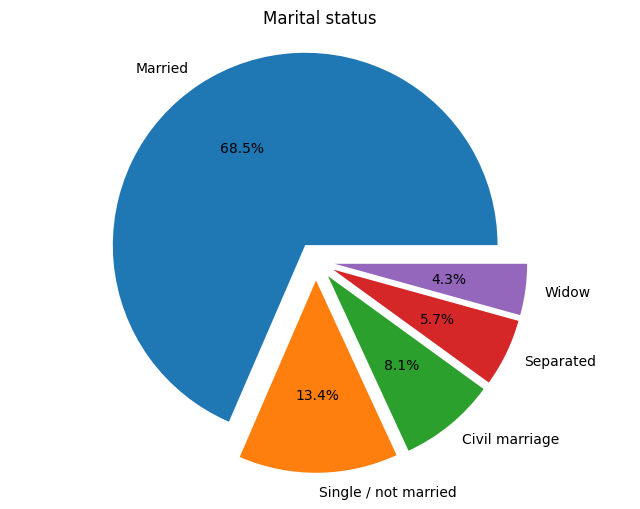

In [45]:
# Obtener los recuentos de cada estado civil
family_status_counts = df_application['NAME_FAMILY_STATUS'].value_counts()

# Configurar el aspecto visual del gráfico
colors = plt.cm.tab10.colors  # Colores para cada porción del pastel
explode = [0.1] * len(family_status_counts)  # Destacar ligeramente cada porción

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(family_status_counts, labels=family_status_counts.index, autopct='%1.1f%%', colors=colors, explode=explode)
plt.title('Marital status')
plt.axis('equal')  # Hacer que el pastel sea circular
plt.show()

We want to know the total number of each of them

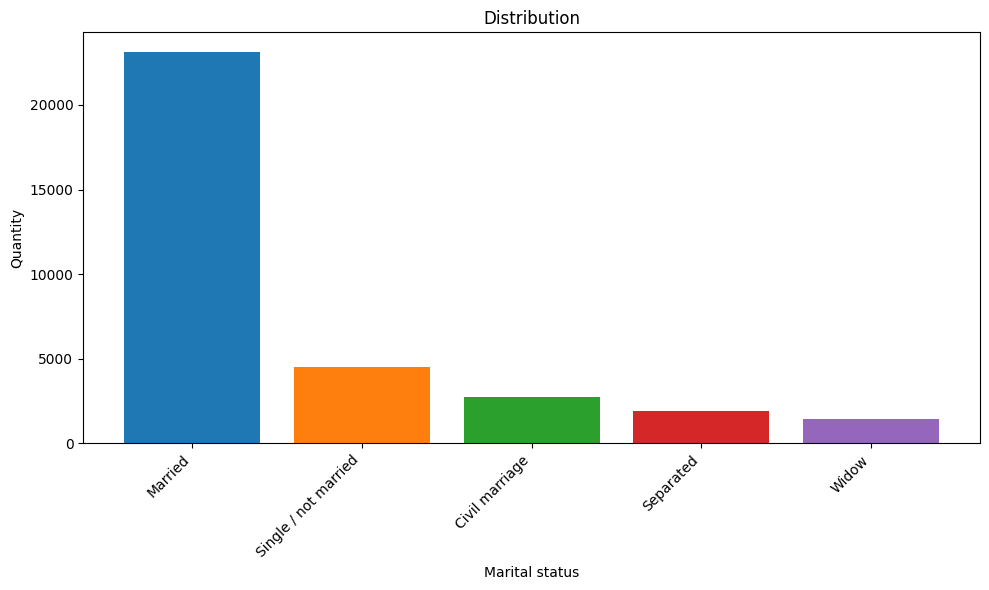

In [47]:
colors_status_fam = plt.cm.tab10.colors[:len(family_status_counts)]

family_status_counts = df_application['NAME_FAMILY_STATUS'].value_counts()

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario
bars = plt.bar(family_status_counts.index, family_status_counts.values, color=colors_status_fam)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Marital status')
plt.ylabel('Quantity')
plt.title('Distribution')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Showing the number of people considered too risky to gain the credit card

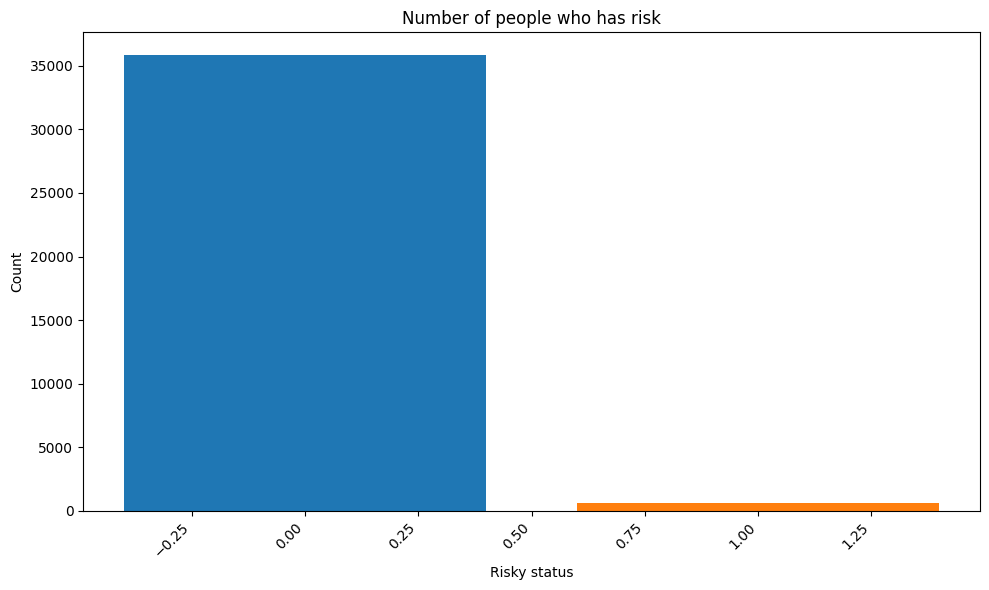

In [ ]:
colors_risky= plt.cm.tab10.colors[:len(df_application['Risky'])]

risky_counts = df_application['Risky'].value_counts()

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario
bars = plt.bar(risky_counts.index, risky_counts.values, color=colors_risky)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Risky status')
plt.ylabel('Count')
plt.title('Number of people who has risk')

# Mostrar el gráfico
plt.tight_layout()
plt.show();

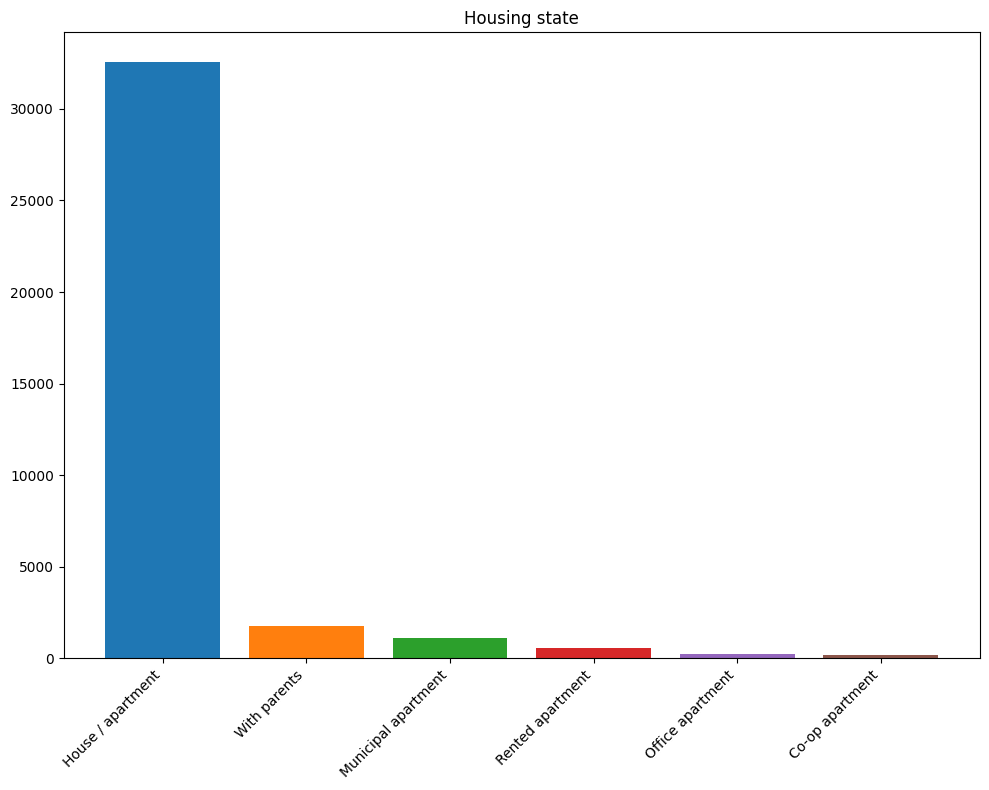

In [ ]:
# Obtener los recuentos de cada vivienda
housing_counts = df_application['NAME_HOUSING_TYPE'].value_counts()

# Configurar el aspecto visual del gráfico
colors_housing = plt.cm.tab10.colors[:len(housing_counts)] # Colores para cada porción


# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
bars = plt.bar(housing_counts.index, housing_counts.values, color=colors_housing)
plt.xticks(rotation=45,ha='right')
plt.title('Housing state')
plt.tight_layout()
plt.show();

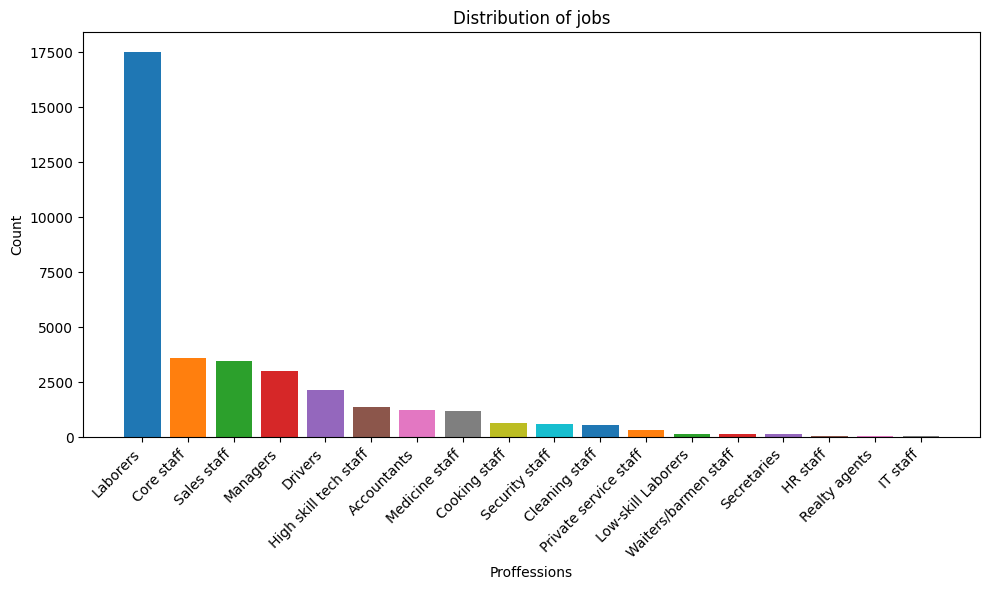

In [ ]:
job_counts = df_application['OCCUPATION_TYPE'].value_counts()

colors_job = plt.cm.tab10.colors[:len(job_counts)]

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario
bars = plt.bar(job_counts.index, job_counts.values, color=colors_job)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Proffessions')
plt.ylabel('Count')
plt.title('Distribution of jobs')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

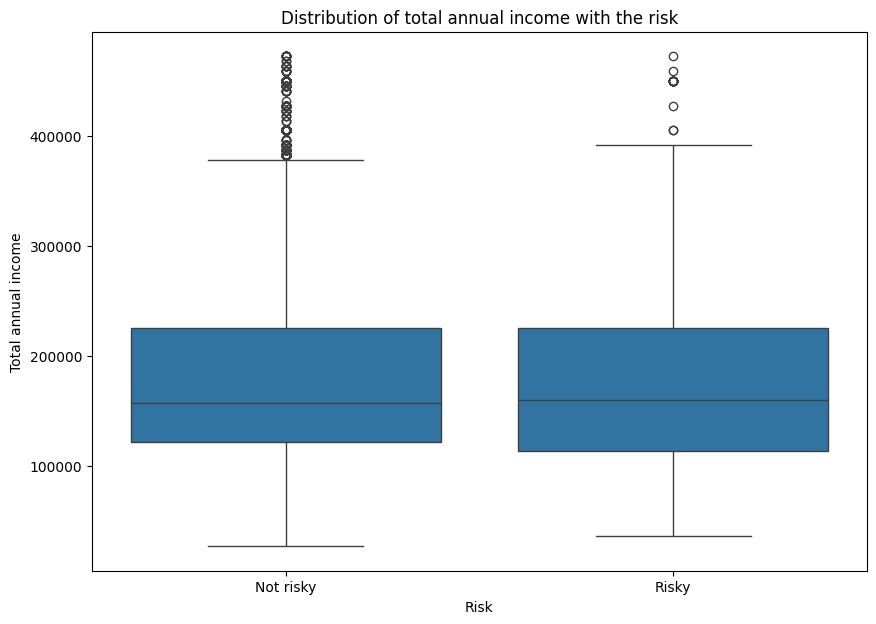

In [48]:
# Crear el gráfico de caja con Seaborn
plt.figure(figsize=(10, 7))  # Ajustar el tamaño del gráfico si es necesario
sns.boxplot(x='Risky', y='AMT_INCOME_TOTAL', data=df_application)
plt.xlabel('Risk')
plt.ylabel('Total annual income')
plt.title('Distribution of total annual income with the risk')
plt.xticks(ticks=[0, 1], labels=['Not risky', 'Risky'])
plt.show()

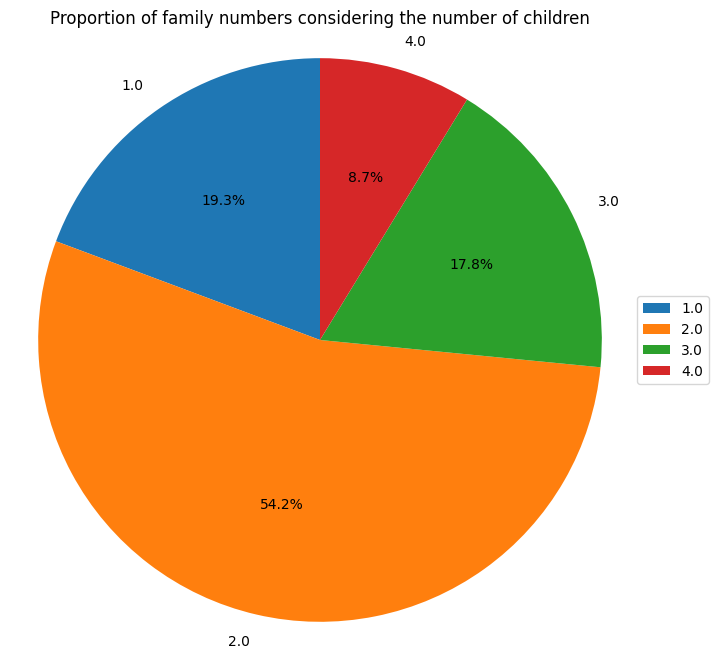

In [49]:
# Calcular el recuento de cada categoría
family_members_counts = df_application['CNT_FAM_MEMBERS'].value_counts()

# Obtener el porcentaje de cada categoría
percentages = (family_members_counts / family_members_counts.sum()) * 100

# Ordenar los porcentajes y los recuentos por la cantidad de miembros de la familia
percentages_sorted = percentages.sort_index()
family_members_counts_sorted = family_members_counts.sort_index()

# Configurar los colores
colors_family = plt.cm.tab10.colors

# Crear el gráfico de anillo
plt.figure(figsize=(8, 8))
plt.pie(family_members_counts_sorted, labels=family_members_counts_sorted.index, autopct='%1.1f%%', startangle=90, colors=colors_family)
plt.title('Proportion of family numbers considering the number of children')

# Colocar la leyenda en el lado derecho
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Hacer que el gráfico sea circular
plt.show()

<ipython-input-50-05d12c40c0e9>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=education_counts.index, y=education_counts.values, ax=axes[1], palette='colorblind')
<ipython-input-50-05d12c40c0e9>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')


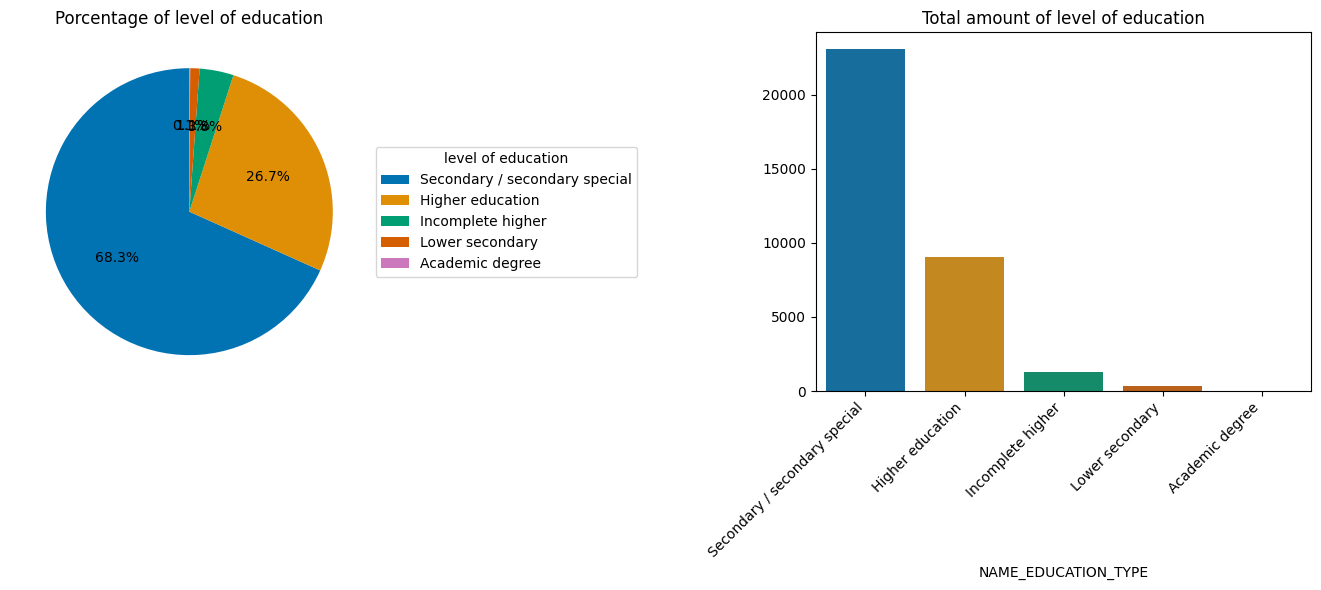

In [50]:
# Obtener el recuento de cada nivel de educación
education_counts = df_application['NAME_EDUCATION_TYPE'].value_counts()

# Obtener los porcentajes de cada nivel de educación
education_percentages = (education_counts / education_counts.sum()) * 100

# Configurar los colores para el gráfico circular
colors_ed = sns.color_palette('colorblind')[0:len(education_counts)]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico circular (pie chart)
wedges, texts, autotexts = axes[0].pie(education_percentages, labels=None, autopct='%1.1f%%', colors=colors_ed, startangle=90)

# Ajustar las etiquetas
for autotext in autotexts:
    autotext.set_fontsize(10)

axes[0].set_title('Porcentage of level of education')

# Añadir leyenda
axes[0].legend(wedges, education_percentages.index, title='level of education', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Gráfico de barras
barplot = sns.barplot(x=education_counts.index, y=education_counts.values, ax=axes[1], palette='colorblind')
axes[1].set_title('Total amount of level of education')

# Inclinar las etiquetas del eje x
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

<ipython-input-51-30a78f059a3f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=intype_counts.index, y=intype_counts.values, ax=axes[1], palette='colorblind')
<ipython-input-51-30a78f059a3f>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')


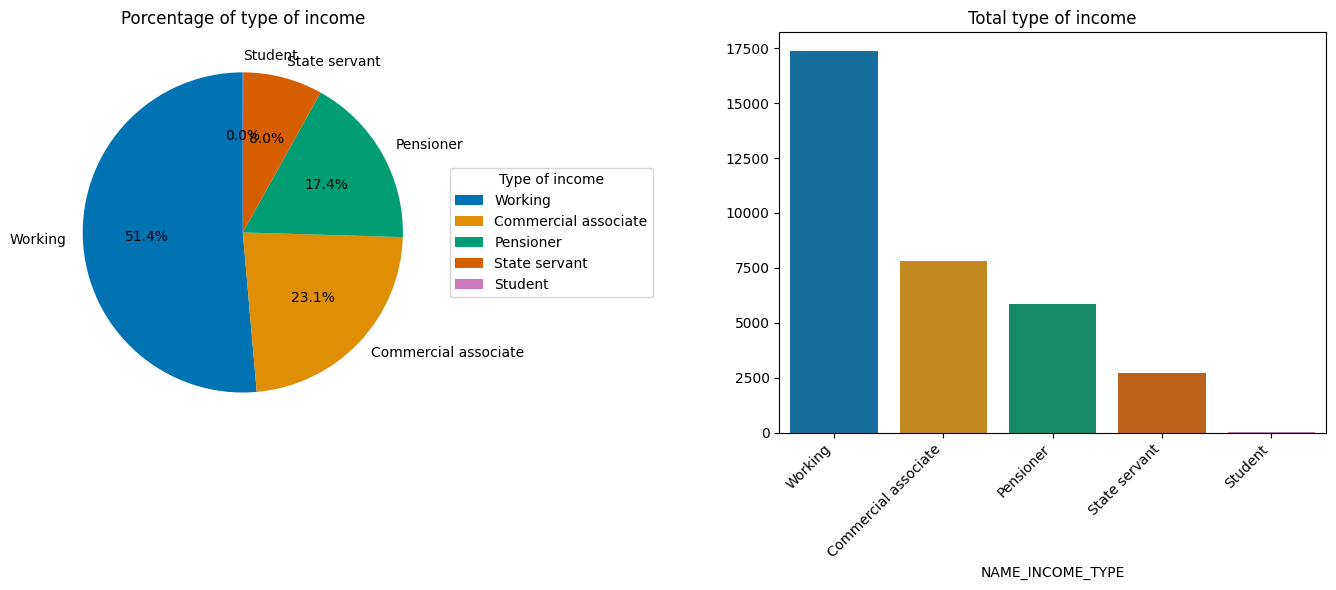

In [51]:
# Obtener el recuento de cada tipo de ingreso
intype_counts = df_application['NAME_INCOME_TYPE'].value_counts()

# Obtener los porcentajes de cada tipo de ingreso
intype_percentages = (intype_counts / intype_counts.sum()) * 100

# Configurar los colores para el gráfico circular
colors_intype = sns.color_palette('colorblind')[0:len(intype_counts)]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico circular (pie chart)
wedges, texts, autotexts = axes[0].pie(intype_percentages, labels=intype_percentages.index, autopct='%1.1f%%', colors=colors_intype, startangle=90)

# Ajustar las etiquetas
for autotext in autotexts:
    autotext.set_fontsize(10)

axes[0].set_title('Porcentage of type of income')

# Añadir leyenda
axes[0].legend(wedges, intype_percentages.index, title='Type of income', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Gráfico de barras
barplot = sns.barplot(x=intype_counts.index, y=intype_counts.values, ax=axes[1], palette='colorblind')
axes[1].set_title('Total type of income')

# Inclinar las etiquetas del eje x
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

<ipython-input-52-e2ab3b208950>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=property_counts.index, y=property_counts.values, ax=axes[1], palette='colorblind')
<ipython-input-52-e2ab3b208950>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')


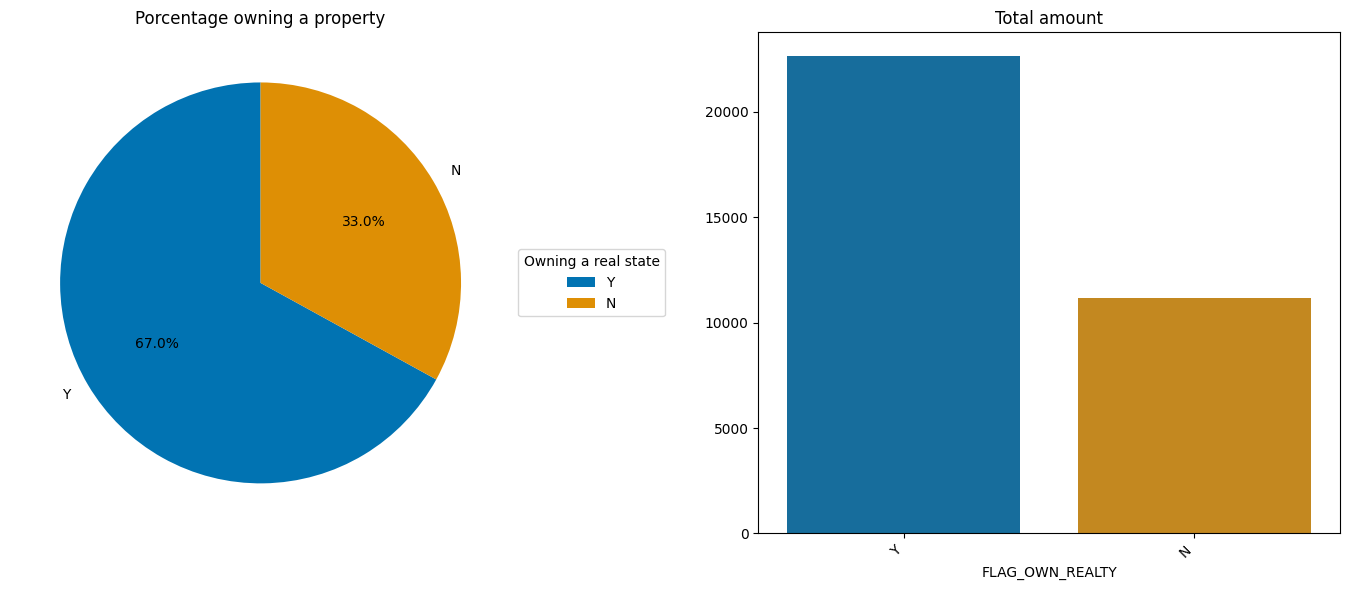

In [52]:
# Obtener el recuento de cada tipo de ingreso
property_counts = df_application['FLAG_OWN_REALTY'].value_counts()

# Obtener los porcentajes de cada tipo de ingreso
property_percentages = (property_counts / property_counts.sum()) * 100

# Configurar los colores para el gráfico circular
colors_property = sns.color_palette('colorblind')[0:len(property_counts)]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico circular (pie chart)
wedges, texts, autotexts = axes[0].pie(property_percentages, labels=property_percentages.index, autopct='%1.1f%%', colors=colors_property, startangle=90)

# Ajustar las etiquetas
for autotext in autotexts:
    autotext.set_fontsize(10)

axes[0].set_title('Porcentage owning a property')

# Añadir leyenda
axes[0].legend(wedges, property_percentages.index, title='Owning a real state', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Gráfico de barras
barplot = sns.barplot(x=property_counts.index, y=property_counts.values, ax=axes[1], palette='colorblind')
axes[1].set_title('Total amount')

# Inclinar las etiquetas del eje x
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

The next section is only made to observe the features that are more correlated with the target one: ***Risky***, se we develop a heat map for that purpose

In [ ]:
df_application1 = df_application.copy()

# Reemplazar los valores en la columna CODE_GENDER
df_application1['CODE_GENDER'] = df_application1['CODE_GENDER'].replace({'M': 1, 'F': 0})

# Reemplazar los valores en la columna FLAG_OWN_CAR
df_application1['FLAG_OWN_CAR'] = df_application1['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})


In [ ]:


df_application1['NAME_EDUCATION_TYPE'] = df_application1['NAME_EDUCATION_TYPE'].replace({
    'Secondary / secondary special': 0,
    'Higher education': 1,
    'Incomplete higher': 2,
    'Lower secondary': 3,
    'Academic degree': 4
})

# Reemplazar valores en las columnas NAME_FAMILY_STATUS
df_application1['NAME_FAMILY_STATUS'] = df_application1['NAME_FAMILY_STATUS'].replace({
    'Separated': 0,
    'Married': 1,
    'Civil marriage': 2,
    'Single / not married': 3,
    'Widow': 4
})

# Reemplazar valores en las columnas NAME_HOUSING_TYPE
df_application1['NAME_HOUSING_TYPE'] = df_application1['NAME_HOUSING_TYPE'].replace({
    'House / apartment': 0,
    'Municipal apartment': 1,
    'With parents': 2,
    'Co-op apartment': 3,
    'Rented apartment': 4,
    'Office apartment': 5
})

# Reemplazar valores en las columnas NAME_INCOME_TYPE
df_application1['NAME_INCOME_TYPE'] = df_application1['NAME_INCOME_TYPE'].replace({
    'State servant': 0,
    'Commercial associate': 1,
    'Working': 2,
    'Pensioner': 3,
    'Student': 4
})

# Reemplazar valores en la columna OCCUPATION_TYPE
df_application1['OCCUPATION_TYPE'] = df_application1['OCCUPATION_TYPE'].replace({
    'Medicine staff': 0,
    'Managers': 1,
    'Core staff': 2,
    'Laborers': 3,
    'Sales staff': 4,
    'Waiters/barmen staff': 5,
    'High skill tech staff': 6,
    'Drivers': 7,
    'HR staff': 8,
    'Cleaning staff': 9,
    'Accountants': 10,
    'Realty agents': 11,
    'Security staff': 12,
    'Secretaries': 13,
    'Cooking staff': 14,
    'Private service staff': 15,
    'IT staff': 16,
    'Low-skill Laborers': 17
})

# Reemplazar valores en la columna Risky
df_application1['Risky'] = df_application1['Risky'].replace({'1': 1, '0': 0})

In [ ]:
df_application1['FLAG_OWN_REALTY'] = df_application1['FLAG_OWN_REALTY'].replace({'Y':1,'N':0})

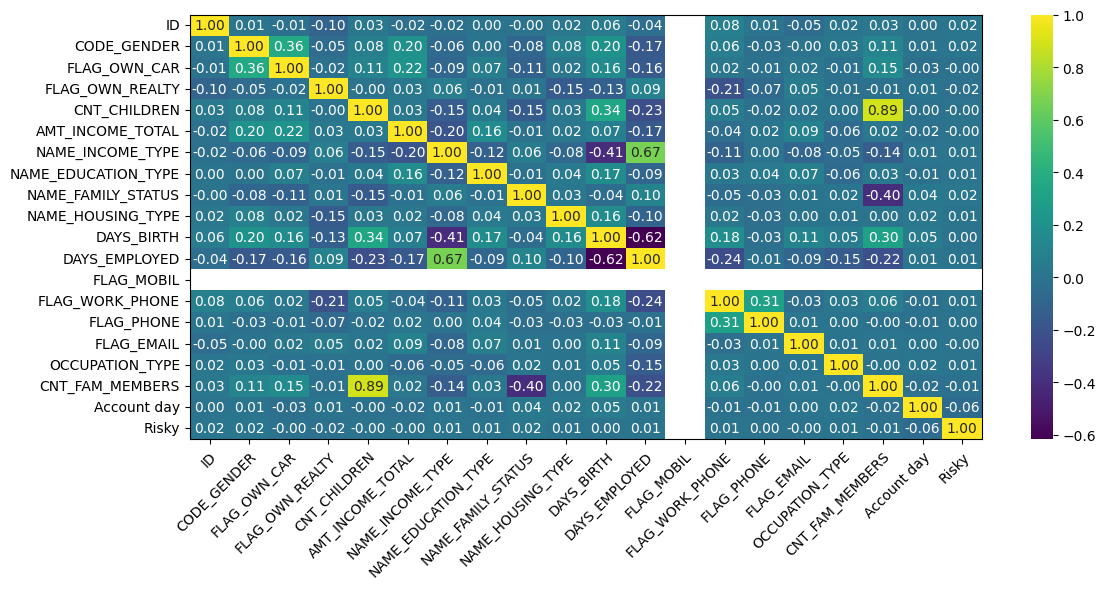

In [ ]:
corr_matrix = df_application1.corr()

# Crear el mapa de calor
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", ax=ax)

# Ajustar la posición y el tamaño de las anotaciones
for _, spine in ax.spines.items():
    spine.set_visible(True)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
df_application1.shape

(36457, 20)

In [ ]:
df_application1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  int64  
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  int64  
 7   NAME_EDUCATION_TYPE  36457 non-null  int64  
 8   NAME_FAMILY_STATUS   36457 non-null  int64  
 9   NAME_HOUSING_TYPE    36457 non-null  int64  
 10  DAYS_BIRTH           36457 non-null  float64
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [ ]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  int64  
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  float64
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

## It's time for the real process to develop our models for prediction

In [ ]:
df_application

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0               M            Y               Y             0   
1               M            Y               Y             0   
2               M            Y               Y             0   
3               F            N               Y             0   
4               F            N               Y             0   
...           ...          ...             ...           ...   
36452           M            Y               Y             0   
36453           F            N               Y             0   
36454           F            N               Y             0   
36455           F            N               Y             0   
36456           M            N               Y             0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              427500.0               Working               Higher education   
1              427500.0               Working               Higher education   
2              112500.0               Working  Secondary / secondary special   
3              270000.0  Commercial associate  Secondary / secondary special   
4              270000.0  Commercial associate  Secondary / secondary special   
...                 ...                   ...                            ...   
36452          315000.0               Working  Secondary / secondary special   
36453          157500.0  Commercial associate               Higher education   
36454          157500.0             Pensioner               Higher education   
36455          283500.0               Working  Secondary / secondary special   
36456          112500.0               Working  Secondary / secondary special   

         NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0            Civil marriage   Rented apartment   32.890411      12.443836   
1            Civil marriage   Rented apartment   32.890411      12.443836   
2                   Married  House / apartment   58.832877       3.106849   
3      Single / not married  House / apartment   52.356164       8.358904   
4      Single / not married  House / apartment   52.356164       8.358904   
...                     ...                ...         ...            ...   
36452               Married  House / apartment   47.528767       6.630137   
36453               Married  House / apartment   33.936986       3.630137   
36454               Married  House / apartment   33.936986       3.630137   
36455               Married  House / apartment   49.200000       1.794521   
36456  Single / not married   Rented apartment   25.172603       3.268493   

       FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0               1                1           0           0        Laborers   
1               1                1           0           0        Laborers   
2               1                0           0           0  Security staff   
3               1                0           1           1     Sales staff   
4               1                0           1           1     Sales staff   
...           ...              ...         ...         ...             ...   
36452           1                0           0           0        Managers   
36453           1                0           1           1  Medicine staff   
36454           1                0           1           1  Medicine staff   
36455           1                0           0           0     Sales staff   
36456           1                0           0           0        Laborers   

       CNT_FAM_MEMBERS  Account day Risky  
0                  2.0        -15.0     0  
1                  2.0        -14.0     0  
2                  2.0        -29.0     0  
3                  1.0         -4.0     0  
4                  1.0        -26.0     0  
...                ...          ...   ...  
36452              2.0        -11.0     1  
36453              2.0        -23.0     1  
36454             

We need to convert the categorial features into numerical


In [53]:
#numerical_features = hp.select_dtypes(include=[np.number]).columns
numerical_data = df_application._get_numeric_data()
num_cols = numerical_data.columns

from sklearn.preprocessing import MinMaxScaler

# Inicializar el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos numéricos
df_application[num_cols] = scaler.fit_transform(df_application[num_cols])



In [54]:
df_application

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
2      0.000000           M            Y               Y           0.0   
3      0.000014           F            N               Y           0.0   
4      0.000021           F            N               Y           0.0   
5      0.000028           F            N               Y           0.0   
6      0.000035           F            N               Y           0.0   
...         ...         ...          ...             ...           ...   
36452  0.995349           M            Y               Y           0.0   
36453  0.995391           F            N               Y           0.0   
36454  0.995419           F            N               Y           0.0   
36455  0.996909           F            N               Y           0.0   
36456  0.998941           M            N               Y           0.0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
2              0.191919               Working  Secondary / secondary special   
3              0.545455  Commercial associate  Secondary / secondary special   
4              0.545455  Commercial associate  Secondary / secondary special   
5              0.545455  Commercial associate  Secondary / secondary special   
6              0.545455  Commercial associate  Secondary / secondary special   
...                 ...                   ...                            ...   
36452          0.646465               Working  Secondary / secondary special   
36453          0.292929  Commercial associate               Higher education   
36454          0.292929             Pensioner               Higher education   
36455          0.575758               Working  Secondary / secondary special   
36456          0.191919               Working  Secondary / secondary special   

         NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  YEARS_BIRTH  YEARS_EMPLOYED  \
2                   Married  House / apartment     0.791768        0.101758   
3      Single / not married  House / apartment     0.657929        0.276396   
4      Single / not married  House / apartment     0.657929        0.276396   
5      Single / not married  House / apartment     0.657929        0.276396   
6      Single / not married  House / apartment     0.657929        0.276396   
...                     ...                ...          ...             ...   
36452               Married  House / apartment     0.558172        0.218912   
36453               Married  House / apartment     0.277303        0.119158   
36454               Married  House / apartment     0.277303        0.119158   
36455               Married  House / apartment     0.592708        0.058122   
36456  Single / not married   Rented apartment     0.096190        0.107133   

       FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
2             0.0              0.0         0.0         0.0  Security staff   
3             0.0              0.0         1.0         1.0     Sales staff   
4             0.0              0.0         1.0         1.0     Sales staff   
5             0.0              0.0         1.0         1.0     Sales staff   
6             0.0              0.0         1.0         1.0     Sales staff   
...           ...              ...         ...         ...             ...   
36452         0.0              0.0         0.0         0.0        Managers   
36453         0.0              0.0         1.0         1.0  Medicine staff   
36454         0.0              0.0         1.0         1.0  Medicine staff   
36455         0.0              0.0         0.0         0.0     Sales staff   
36456         0.0              0.0         0.0         0.0        Laborers   

       CNT_FAM_MEMBERS  Account day Risky  
2             0.333333     0.516667     0  
3             0.000000     0.933333     0  
4             0.000000     0.566667     0  
5             0.000000     0.566667     0  
6             0.000000     0.366667     0  
...          

In [55]:
import numpy as np

df_dummies = pd.get_dummies(data = df_application[["FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
                                                   "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE",
                                                   "Risky"]], drop_first = True)

df_num_features=df_application.select_dtypes(include=np.number)

df = pd.concat([df_num_features, df_dummies], axis = 1)

In [56]:
df.head()

ID  CNT_CHILDREN  AMT_INCOME_TOTAL  YEARS_BIRTH  YEARS_EMPLOYED  \
2  0.000000           0.0          0.191919     0.791768        0.101758   
3  0.000014           0.0          0.545455     0.657929        0.276396   
4  0.000021           0.0          0.545455     0.657929        0.276396   
5  0.000028           0.0          0.545455     0.657929        0.276396   
6  0.000035           0.0          0.545455     0.657929        0.276396   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  ...  \
2         0.0              0.0         0.0         0.0         0.333333  ...   
3         0.0              0.0         1.0         1.0         0.000000  ...   
4         0.0              0.0         1.0         1.0         0.000000  ...   
5         0.0              0.0         1.0         1.0         0.000000  ...   
6         0.0              0.0         1.0         1.0         0.000000  ...   

   OCCUPATION_TYPE_Low-skill Laborers  OCCUPATION_TYPE_Managers  \
2                               False                     False   
3                               False                     False   
4                               False                     False   
5                               False                     False   
6                               False                     False   

   OCCUPATION_TYPE_Medicine staff  OCCUPATION_TYPE_Private service staff  \
2                           False                                  False   
3                           False                                  False   
4                           False                                  False   
5                           False                                  False   
6                           False                                  False   

   OCCUPATION_TYPE_Realty agents  OCCUPATION_TYPE_Sales staff  \
2                          False                        False   
3                          False                         True   
4                          False                         True   
5                          False                         True   
6                          False                         True   

   OCCUPATION_TYPE_Secretaries  OCCUPATION_TYPE_Security staff  \
2                        False                            True   
3                        False                           False   
4                        False                           False   
5                        False                           False   
6                        False                           False   

   OCCUPATION_TYPE_Waiters/barmen staff  Risky_1  
2                                 False    False  
3                                 False    False  
4                                 False    False  
5                                 False    False  
6                                 False    False  

[5 rows x 47 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 46 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       36457 non-null  float64
 1   AMT_INCOME_TOTAL                                   36457 non-null  float64
 2   YEARS_BIRTH                                        36457 non-null  float64
 3   YEARS_EMPLOYED                                     36457 non-null  float64
 4   FLAG_MOBIL                                         36457 non-null  float64
 5   FLAG_WORK_PHONE                                    36457 non-null  float64
 6   FLAG_PHONE                                         36457 non-null  float64
 7   FLAG_EMAIL                                         36457 non-null  float64
 8   CNT_FAM_MEMBERS                                    36457 non-null  float64
 9   Accoun

In [ ]:
# Exportar el DataFrame a CSV
df.to_csv('df_good.csv', index=False)

## Preprocessing process

In [57]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
!pip3 install shap
import shap #this library is the interpretabiluty


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.9 MB/s eta 0:00:00


In [58]:
from sklearn.preprocessing import StandardScaler

#numerical_features = hp.select_dtypes(include=[np.number]).columns
numerical_data = df_application._get_numeric_data()
num_cols = numerical_data.columns

scaler = StandardScaler()
numercial_df = pd.DataFrame(scaler.fit_transform(numerical_data), columns= num_cols, index=df_application.index)

In [59]:
df_application.dtypes

ID                     float64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
YEARS_BIRTH            float64
YEARS_EMPLOYED         float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
Account day            float64
Risky                   object
dtype: object

In [60]:
import numpy as np

df_dummies = pd.get_dummies(data = df_application[["FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
                                                   "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE",
                                                   "Risky"]], drop_first = True)

df_num_features=df_application.select_dtypes(include=np.number)

df = pd.concat([df_num_features, df_dummies], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 46 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       36457 non-null  int64  
 1   AMT_INCOME_TOTAL                                   36457 non-null  float64
 2   DAYS_BIRTH                                         36457 non-null  float64
 3   DAYS_EMPLOYED                                      36457 non-null  int64  
 4   FLAG_MOBIL                                         36457 non-null  int64  
 5   FLAG_WORK_PHONE                                    36457 non-null  int64  
 6   FLAG_PHONE                                         36457 non-null  int64  
 7   FLAG_EMAIL                                         36457 non-null  int64  
 8   CNT_FAM_MEMBERS                                    36457 non-null  float64
 9   Accoun

In [ ]:
df.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
0             0          427500.0  -32.890411          -4542           1   
1             0          427500.0  -32.890411          -4542           1   
2             0          112500.0  -58.832877          -1134           1   
3             0          270000.0  -52.356164          -3051           1   
4             0          270000.0  -52.356164          -3051           1   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  Account day  ...  \
0                1           0           0              2.0        -15.0  ...   
1                1           0           0              2.0        -14.0  ...   
2                0           0           0              2.0        -29.0  ...   
3                0           1           1              1.0         -4.0  ...   
4                0           1           1              1.0        -26.0  ...   

   OCCUPATION_TYPE_Low-skill Laborers  OCCUPATION_TYPE_Managers  \
0                                   0                         0   
1                                   0                         0   
2                                   0                         0   
3                                   0                         0   
4                                   0                         0   

   OCCUPATION_TYPE_Medicine staff  OCCUPATION_TYPE_Private service staff  \
0                               0                                      0   
1                               0                                      0   
2                               0                                      0   
3                               0                                      0   
4                               0                                      0   

   OCCUPATION_TYPE_Realty agents  OCCUPATION_TYPE_Sales staff  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            1   
4                              0                            1   

   OCCUPATION_TYPE_Secretaries  OCCUPATION_TYPE_Security staff  \
0                            0                               0   
1                            0                               0   
2                            0                               1   
3                            0                               0   
4                            0                               0   

   OCCUPATION_TYPE_Waiters/barmen staff  Risky_1  
0                                     0        0  
1                                     0        0  
2                                     0        0  
3                                     0        0  
4                                     0        0  

[5 rows x 46 columns]

In [61]:
target = df['Risky_1']
feats = df.drop('Risky_1', axis=1)

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2)

In [ ]:
X_train.shape

(29165, 45)

In [ ]:
X_test.shape

(7292, 45)

## The next section is very important. It's going to be the part of the interpretation of the features and its impact on the models. In the streamlit web app it's a section where we explain it properly

In [ ]:
import xgboost as xgb

params = {'objective': 'binary:logistic', 'max_depth':6, 'eval_metric':'logloss'}

dtrain = xgb.DMatrix(X_train,label=y_train)

dtest = xgb.DMatrix(data=X_test,label=y_test)


bst = xgb.train(params,dtrain,1000)

In [ ]:
explainer = shap.TreeExplainer(bst,
                               data = X_train,
                               model_output="probability")

shap_values = explainer.shap_values(X_test)

print('Expected value: ', explainer.expected_value)

pd.DataFrame(shap_values).head()

100%|===================| 7279/7292 [07:03<00:00]       

Expected value:  0.009937776906588454


0         1         2         3    4         5         6   \
0  0.000004 -0.002066 -0.003525 -0.000598  0.0 -0.000154  0.000410   
1 -0.000676  0.000071 -0.001086 -0.001032  0.0 -0.001101 -0.000006   
2 -0.000191 -0.000245 -0.001284 -0.002399  0.0 -0.000554 -0.000169   
3 -0.000926 -0.001207 -0.001006 -0.000579  0.0 -0.000072  0.000003   
4 -0.000297 -0.000483 -0.000339 -0.002311  0.0 -0.000286  0.000005   

             7         8         9   ...        35        36            37  \
0 -1.905237e-04  0.000021 -0.001432  ... -0.000631 -0.001576 -9.611477e-06   
1  1.062194e-06 -0.000548 -0.000538  ... -0.000358 -0.000948  6.508490e-06   
2  2.552499e-06 -0.000126 -0.001668  ... -0.000224 -0.001289  2.505278e-06   
3  5.373243e-07 -0.000122 -0.002283  ... -0.000462 -0.000960  4.883325e-07   
4  1.264591e-06 -0.000002 -0.002690  ...  0.000007 -0.001207  2.478978e-06   

             38        39   40            41   42   43   44  
0 -1.364006e-06  0.000005  0.0  4.756825e-06  0.0  0.0  0.0  
1 -1.891129e-06  0.000006  0.0  3.422816e-06  0.0  0.0  0.0  
2 -1.977795e-07  0.000004  0.0  1.850234e-06  0.0  0.0  0.0  
3  8.628616e-08  0.000001  0.0  3.283385e-07  0.0  0.0  0.0  
4 -2.341628e-07  0.000002  0.0 -7.047972e-04  0.0  0.0  0.0  

[5 rows x 45 columns]

In [ ]:
explainer = shap.TreeExplainer(bst,
                               data = X_train,
                               model_output="probability")

shap_values = explainer.shap_values(X_test)

print('Expected value: ', explainer.expected_value)

pd.DataFrame(shap_values).head()

100%|===================| 7284/7292 [06:59<00:00]       

Expected value:  0.009937776906588454


0         1         2         3    4         5         6   \
0  0.000004 -0.002066 -0.003525 -0.000598  0.0 -0.000154  0.000410   
1 -0.000676  0.000071 -0.001086 -0.001032  0.0 -0.001101 -0.000006   
2 -0.000191 -0.000245 -0.001284 -0.002399  0.0 -0.000554 -0.000169   
3 -0.000926 -0.001207 -0.001006 -0.000579  0.0 -0.000072  0.000003   
4 -0.000297 -0.000483 -0.000339 -0.002311  0.0 -0.000286  0.000005   

             7         8         9   ...        35        36            37  \
0 -1.905237e-04  0.000021 -0.001432  ... -0.000631 -0.001576 -9.611477e-06   
1  1.062194e-06 -0.000548 -0.000538  ... -0.000358 -0.000948  6.508490e-06   
2  2.552499e-06 -0.000126 -0.001668  ... -0.000224 -0.001289  2.505278e-06   
3  5.373243e-07 -0.000122 -0.002283  ... -0.000462 -0.000960  4.883325e-07   
4  1.264591e-06 -0.000002 -0.002690  ...  0.000007 -0.001207  2.478978e-06   

             38        39   40            41   42   43   44  
0 -1.364006e-06  0.000005  0.0  4.756825e-06  0.0  0.0  0.0  
1 -1.891129e-06  0.000006  0.0  3.422816e-06  0.0  0.0  0.0  
2 -1.977795e-07  0.000004  0.0  1.850234e-06  0.0  0.0  0.0  
3  8.628616e-08  0.000001  0.0  3.283385e-07  0.0  0.0  0.0  
4 -2.341628e-07  0.000002  0.0 -7.047972e-04  0.0  0.0  0.0  

[5 rows x 45 columns]

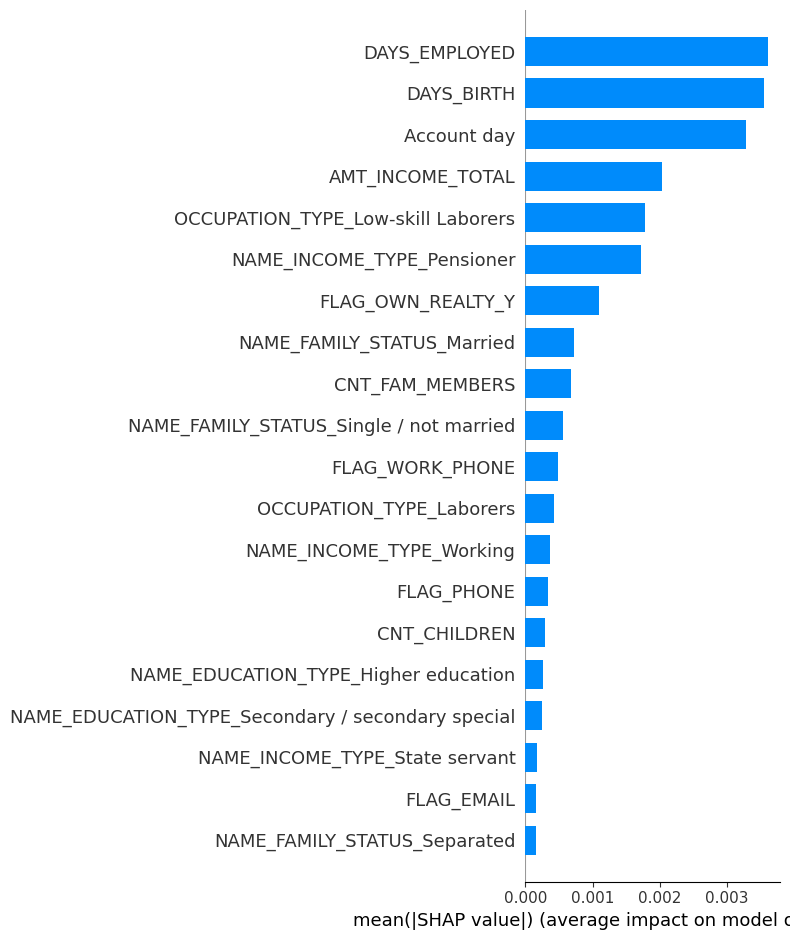

In [ ]:
shap.summary_plot(shap_values,X_test,plot_type='bar')

100%|===================| 36447/36457 [39:53<00:00]       

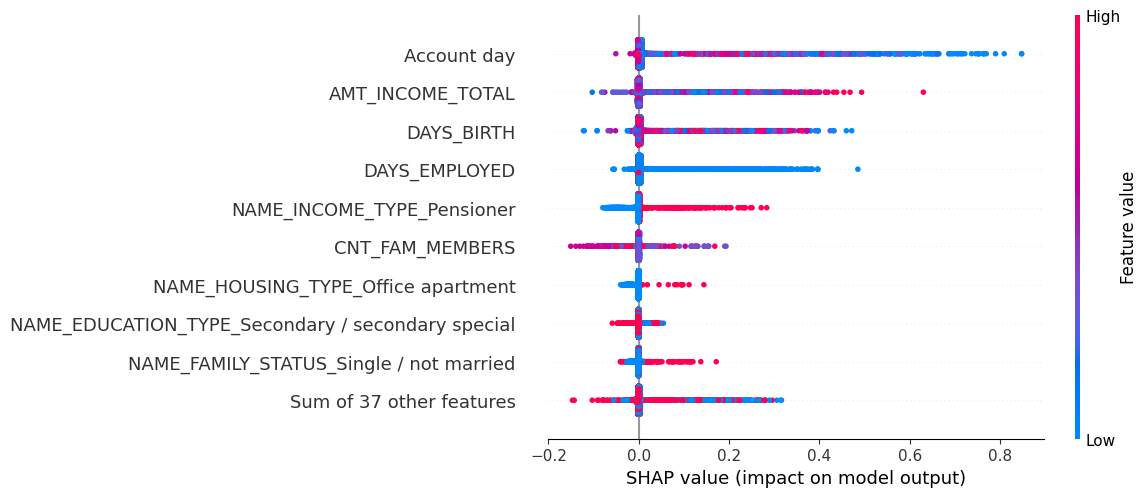

In [ ]:
explanation = explainer(df)
shap.plots.beeswarm(explanation)

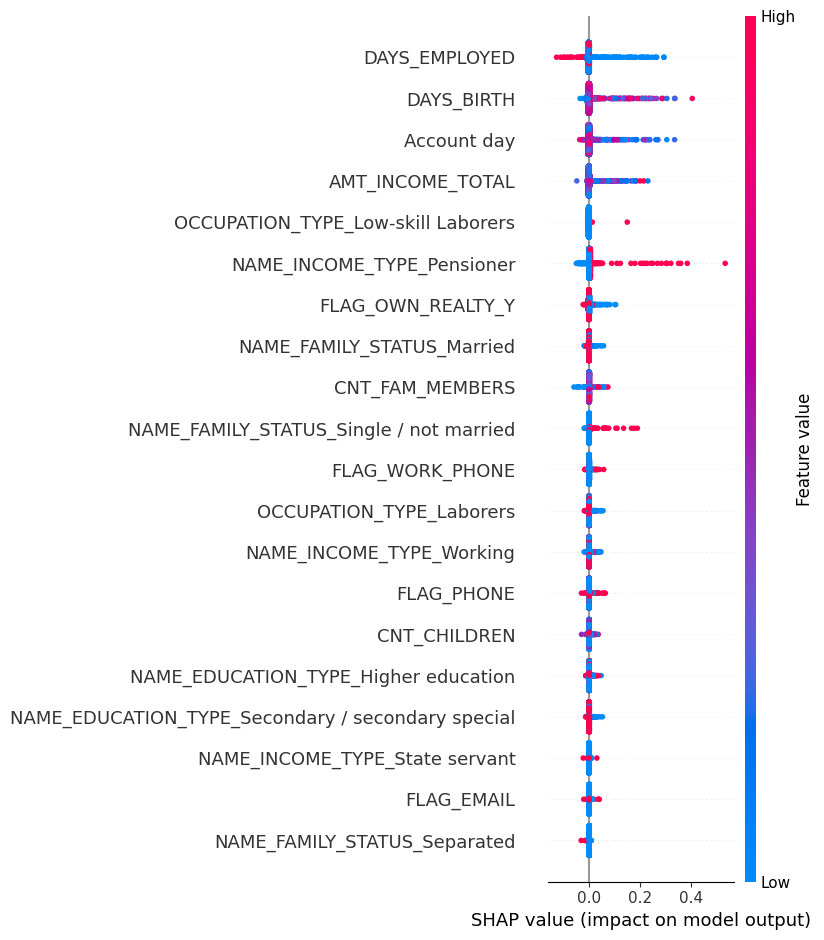

In [ ]:
shap.summary_plot(shap_values,X_test)

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value,shap_values[3,:],X_test.iloc[3,:])

In [ ]:
shap.initjs() #If we don't use this command, it won't display the graph. It should be used in every cell

shap.force_plot(explainer.expected_value,shap_values[:1000],X_test[:1000])

So let's use the models

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. training the model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

# 2. Evaluation of precision
y_pred = gbr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination (R^2):", r2)


Coefficient of determination (R^2): 0.019530034709810296


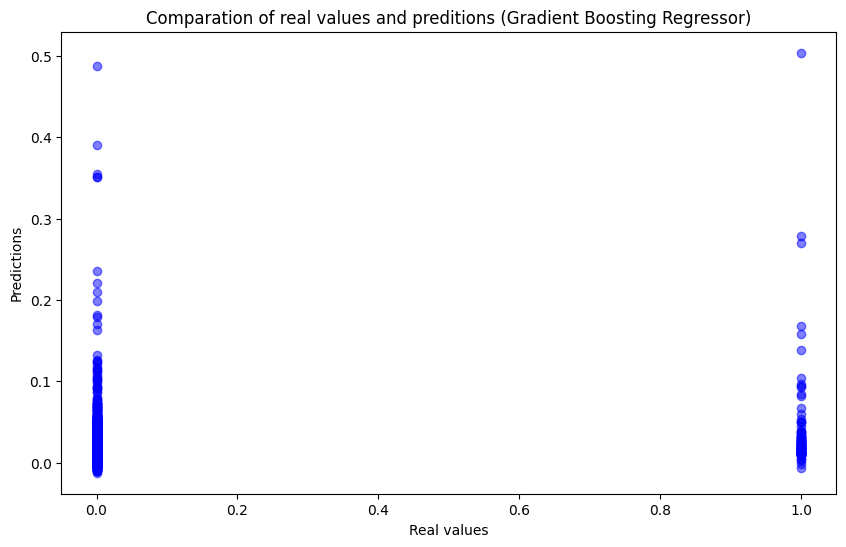

In [64]:
# 3. Visualization of efficency
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Comparation of real values and preditions (Gradient Boosting Regressor)')
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squarred Error (MSE):", mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squarred Error (MSE): 0.016550359019815723
Mean Absolute Error (MAE): 0.03313713054537531


In [66]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. Training the SVR model
svr_model = SVR(kernel='rbf')  # kernel radial
svr_model.fit(X_train, y_train)

# 2. Evaluation of precision
y_pred_svr = svr_model.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)
print("Coeficiente de determinación (R^2) SVR:", r2_svr)


Coeficiente de determinación (R^2) SVR: -0.2641857034408839


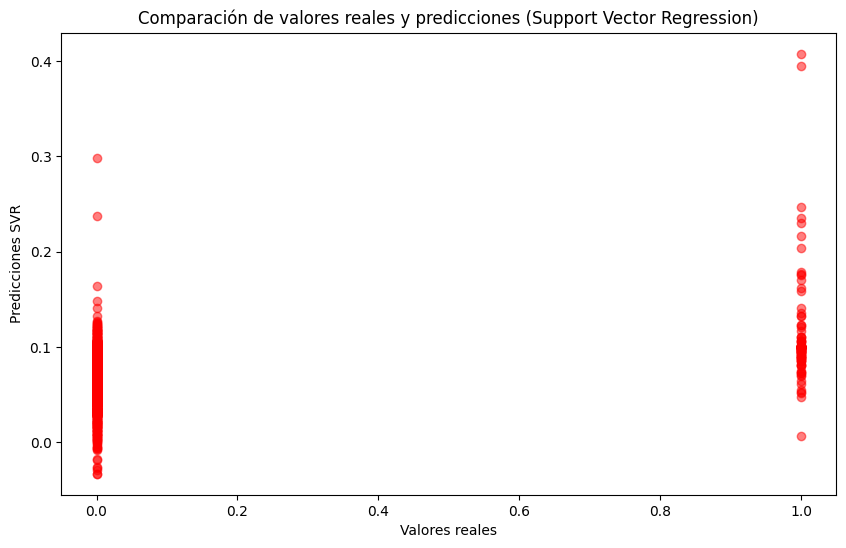

In [67]:
# 3. Visualization of performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='red', alpha=0.5)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones SVR')
plt.title('Comparación de valores reales y predicciones (Support Vector Regression)')
plt.show()

In [68]:
# Let's see the KNN classificator

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Creamos una lista para almacenar las puntuaciones de precisión
accuracy_scores = []

# Probamos con diferentes números de vecinos
neighbors_range = range(1, 11)
for n_neighbors in neighbors_range:
    # Inicializamos el clasificador KNN con el número de vecinos actual
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Entrenamos el modelo KNN
    knn.fit(X_train, y_train)

    # Realizamos predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test)

    # Calculamos la precisión y la almacenamos
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


In [ ]:
X_train.shape

(29165, 46)

In [ ]:
X_test.shape

(7292, 46)

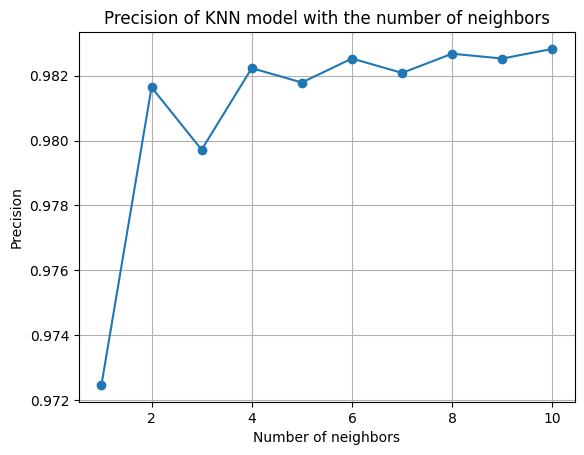

Optimal number of neighbors: 10


In [69]:

# Plotting the precision depending the number of neighbors
plt.plot(neighbors_range, accuracy_scores, marker='o')
plt.xlabel('Number of neighbors')
plt.ylabel('Precision')
plt.title('Precision of KNN model with the number of neighbors')
plt.grid(True)
plt.show()

# Encontramos el número óptimo de vecinos
optimal_neighbors = neighbors_range[np.argmax(accuracy_scores)]
print(f"Optimal number of neighbors: {optimal_neighbors}")

# Entrenamos el modelo KNN con el número óptimo de vecinos
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_neighbors)
knn_optimal.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_optimal = knn_optimal.predict(X_test)




In [ ]:
df

ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
0      5008804             0          427500.0      -12005          -4542   
1      5008805             0          427500.0      -12005          -4542   
2      5008806             0          112500.0      -21474          -1134   
3      5008808             0          270000.0      -19110          -3051   
4      5008809             0          270000.0      -19110          -3051   
...        ...           ...               ...         ...            ...   
36452  5149828             0          315000.0      -17348          -2420   
36453  5149834             0          157500.0      -12387          -1325   
36454  5149838             0          157500.0      -12387          -1325   
36455  5150049             0          283500.0      -17958           -655   
36456  5150337             0          112500.0       -9188          -1193   

       FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0               1                1           0           0              2.0   
1               1                1           0           0              2.0   
2               1                0           0           0              2.0   
3               1                0           1           1              1.0   
4               1                0           1           1              1.0   
...           ...              ...         ...         ...              ...   
36452           1                0           0           0              2.0   
36453           1                0           1           1              2.0   
36454           1                0           1           1              2.0   
36455           1                0           0           0              2.0   
36456           1                0           0           0              1.0   

       ...  OCCUPATION_TYPE_Low-skill Laborers  OCCUPATION_TYPE_Managers  \
0      ...                                   0                         0   
1      ...                                   0                         0   
2      ...                                   0                         0   
3      ...                                   0                         0   
4      ...                                   0                         0   
...    ...                                 ...                       ...   
36452  ...                                   0                         1   
36453  ...                                   0                         0   
36454  ...                                   0                         0   
36455  ...                                   0                         0   
36456  ...                                   0                         0   

       OCCUPATION_TYPE_Medicine staff  OCCUPATION_TYPE_Private service staff  \
0                                   0                                      0   
1                                   0                                      0   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   
...                               ...                                    ...   
36452                               0                                      0   
36453                               1                                      0   
36454                               1                                      0   
36455                               0                                      0   
36456                               0                                      0   

       OCCUPATION_TYPE_Realty agents  OCCUPATION_TYPE_Sales staff  \
0                                  0                            0   
1                                  0                            0   
2                                  0                     

### The next section is the comparative of several models of classification

In [71]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear los modelos
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Entrenar los modelos
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Hacer predicciones
rf_predictions = random_forest_model.predict(X_test)
gb_predictions = gradient_boosting_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Calcular métricas de rendimiento
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Mostrar resultados
print("Random Forest Regressor:")
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("R^2:", rf_r2)
print()



Random Forest Regressor:
RMSE: 0.1282172585242582
MAE: 0.03160053301747113
R^2: 0.02608770428359175



In [72]:
print("Gradient Boosting Regressor:")
print("RMSE:", gb_rmse)
print("MAE:", gb_mae)
print("R^2:", gb_r2)
print()


Gradient Boosting Regressor:
RMSE: 0.1286531699061226
MAE: 0.03313169778186996
R^2: 0.019454258343219344



In [73]:

print("XGBoost Regressor:")
print("RMSE:", xgb_rmse)
print("MAE:", xgb_mae)
print("R^2:", xgb_r2)


XGBoost Regressor:
RMSE: 0.12238883
MAE: 0.034552734
R^2: 0.11261832559587392


# Comparative by plots

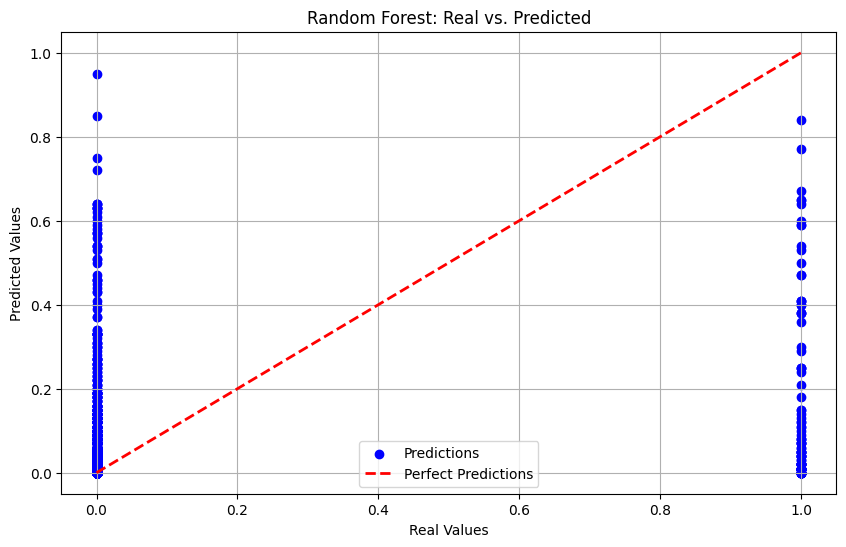

In [74]:
import matplotlib.pyplot as plt

# Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')
plt.title('Random Forest: Real vs. Predicted')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

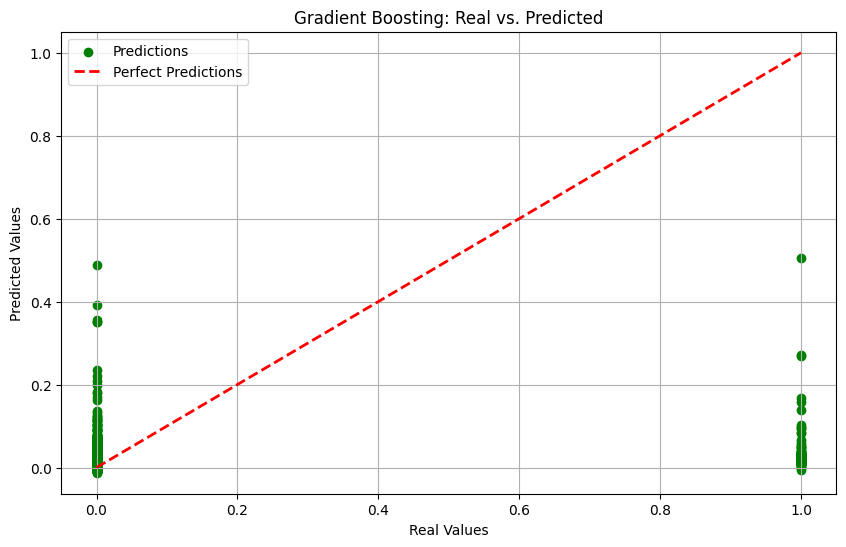

In [75]:
#  Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_predictions, color='green', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')
plt.title('Gradient Boosting: Real vs. Predicted')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

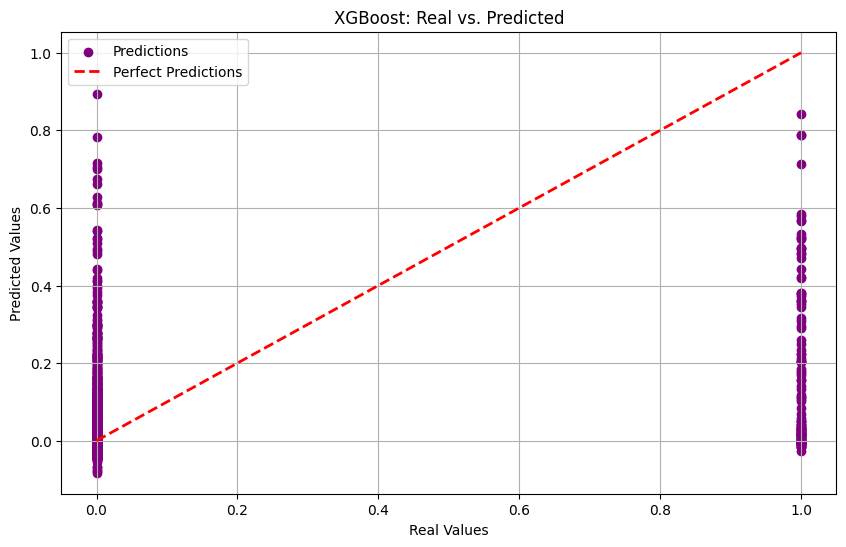

In [76]:
#  XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_predictions, color='purple', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')
plt.title('XGBoost: Real vs. Predicted')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

We can have more details, more intuitively with the ROC curve

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


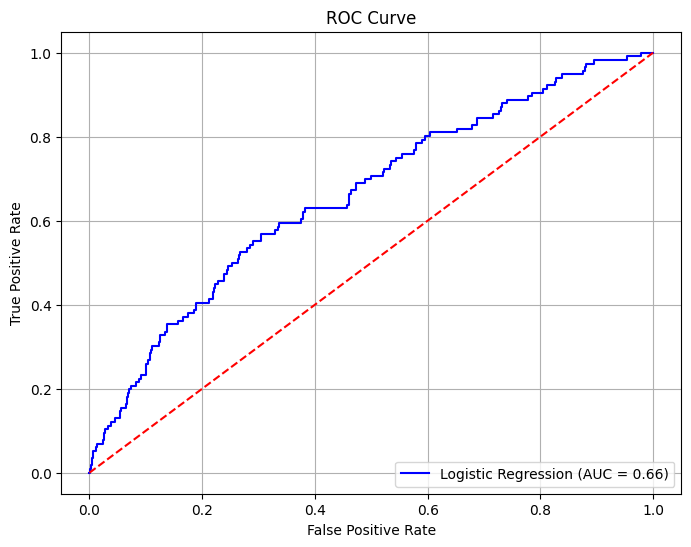

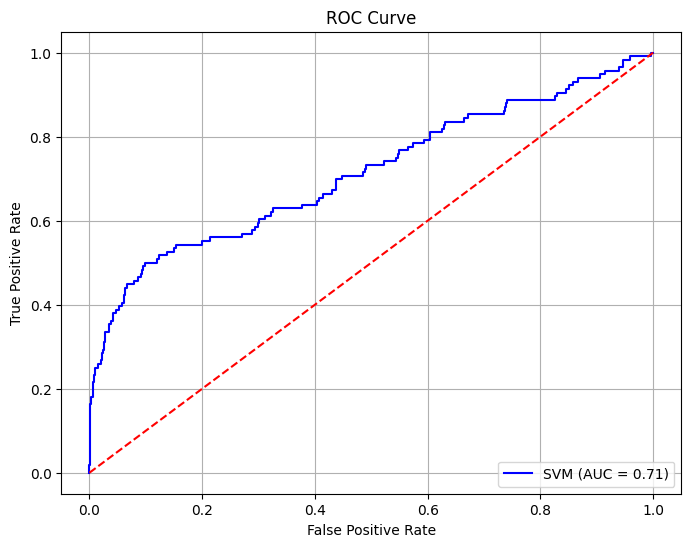

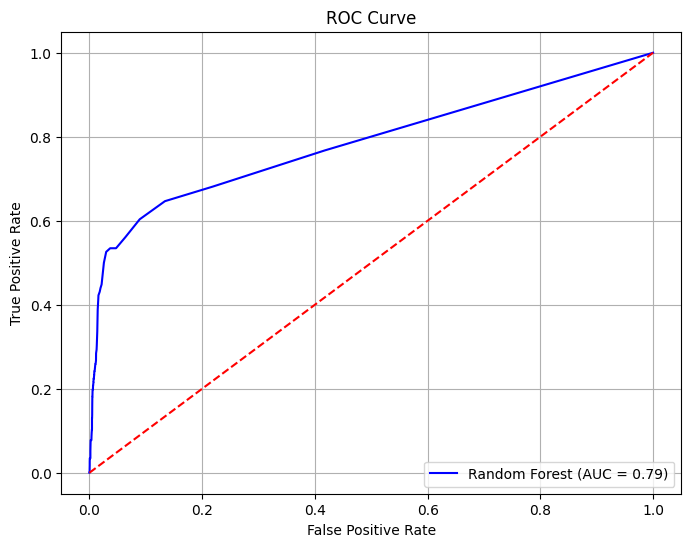

In [78]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(model, X_test, y_test, model_name):
    # Obtain the probabilistics of
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    # Calculate the false positives (fpr) and the true positives (tpr)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Calculate the area beneath ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Sample for each model

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
plot_roc(logistic_model, X_test, y_test, 'Logistic Regression')

# SVM (Support Vector Machine)
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
plot_roc(svm_model, X_test, y_test, 'SVM')

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
plot_roc(rf_model, X_test, y_test, 'Random Forest')
